# Example long full smlns for mean- vs fluc-driven sequences

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys

from aux import get_c_mean_p, get_c_spd
from disp import set_plot
from ntwk import SoftmaxNtwk

In [2]:
D = 16

mself = np.eye(D, dtype=bool)
mseq = np.diag(np.ones(D-1), -1).astype(bool)
mseq[0, -1] = True  # periodic

t_max = 2000
t = np.arange(t_max)

t_start = 200  # for speed estimation

In [3]:
A = np.arange(0, 2*np.pi, 2*np.pi/D)

In [4]:
N_MD = 2500
N_FD = 2500

# Mean-driven sequence network (starting from mean-self-coupled network)

In [5]:
MU_J_SELF = 3
MU_J_CROSS = 0
MU_J_SEQ = 2.3

SGM_J_SELF = 1
SGM_J_CROSS = 1
SGM_J_SEQ = 1

MU_J = np.nan*np.zeros((D, D))
SGM_J = np.nan*np.zeros((D, D))

MU_J[mself] = MU_J_SELF
MU_J[~mself] = MU_J_CROSS
MU_J[mseq] = MU_J_SEQ

SGM_J[mself] = SGM_J_SELF
SGM_J[~mself] = SGM_J_CROSS
SGM_J[mseq] = SGM_J_SEQ

J = np.nan*np.zeros((D, D, N_MD, N_MD))

for d_to in range(D):
    for d_from in range(D):
        J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N_MD)*np.random.randn(N_MD, N_MD) + MU_J[d_to, d_from]*D/N_MD

ntwk = SoftmaxNtwk(J)

x_0 = np.random.randn(N_MD, D)
x_0[:, :10] *= 5
g = np.inf
t, xs, ys = ntwk.run(g=g, t_max=t_max, x_0=x_0, progress=50)

ths_md = ys.mean(axis=1)

.......................................

In [6]:
# estimate speeds
c_mean_md = get_c_mean_p(A, ths_md)
spd_md = get_c_spd(c_mean_md, 100)*D/(2*np.pi)

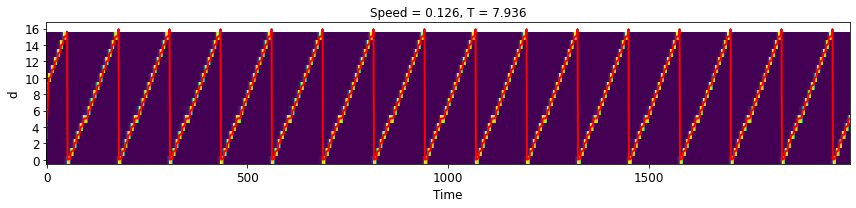

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3), tight_layout=True)

ax.matshow(ths_md.T, origin='lower')
ax.set_aspect('auto')
ax.plot((c_mean_md % (2*np.pi))*D/(2*np.pi), c='r', lw=2)

ax.xaxis.tick_bottom()
set_plot(ax, x_label='Time', y_label='d', title=f'Speed = {spd_md:.3f}, T = {1/spd_md:.3f}')

In [9]:
# compute histogram window over integer number of periods
per_md = 1/spd_md*D
look_back_md = int(round(per_md * (int(np.floor(t_max/per_md)) - 1)))

print(f'Look back (mean-driven): {look_back_md}')

Look back (mean-driven): 1778


In [10]:
np.save('data/seq_speed/seqs_long_full_md.npy', np.array([{
    'D': D,
    
    'ths_md': ths_md,
    'c_mean_md': c_mean_md,
    'spd_md': spd_md,
    'look_back_md': look_back_md,
}]))

# Variance-driven sequence network (starting from variance self-coupled network)

In [ ]:
MU_J_SELF = 0
MU_J_CROSS = 0
MU_J_SEQ = 0

SGM_J_SELF = 10
SGM_J_CROSS = 1
SGM_J_SEQ = 4.2

MU_J = np.nan*np.zeros((D, D))
SGM_J = np.nan*np.zeros((D, D))

MU_J[mself] = MU_J_SELF
MU_J[~mself] = MU_J_CROSS
MU_J[mseq] = MU_J_SEQ

SGM_J[mself] = SGM_J_SELF
SGM_J[~mself] = SGM_J_CROSS
SGM_J[mseq] = SGM_J_SEQ

J = np.nan*np.zeros((D, D, N_FD, N_FD))

for d_to in range(D):
    for d_from in range(D):
        J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N_FD)*np.random.randn(N_FD, N_FD) + MU_J[d_to, d_from]*D/N_FD

ntwk = SoftmaxNtwk(J)

x_0 = np.random.randn(N_FD, D)
x_0[:, :10] *= 5
g = np.inf
t, xs, ys = ntwk.run(g=g, t_max=t_max, x_0=x_0, progress=50)

ths_fd = ys.mean(axis=1)

In [ ]:
# estimate speeds
c_mean_fd = get_c_mean_p(A, ths_fd)
spd_fd = get_c_spd(c_mean_fd, t_start)*D/(2*np.pi)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3), tight_layout=True)

ax.matshow(ths_fd.T, origin='lower')
ax.set_aspect('auto')
ax.plot((c_mean_fd % (2*np.pi))*D/(2*np.pi), c='r', lw=2)

ax.xaxis.tick_bottom()
set_plot(ax, x_label='Time', y_label='d', title=f'Speed = {spd_fd:.3f}, T = {1/spd_fd:.3f}')

## Compare histograms of circular mean locations

In [ ]:
# compute histogram window over integer number of periods
per_md = 1/spd_md*D
look_back_md = int(round(per_md * (int(np.floor(t_max/per_md)) - 1)))

per_fd = 1/spd_fd*D
look_back_fd = int(round(per_fd * (int(np.floor(t_max/per_fd)) - 1)))

print(f'Look back (mean-driven): {look_back_md}')
print(f'Look back (fluc-driven): {look_back_fd}')

In [ ]:
bins = np.linspace(-np.pi, np.pi, 2*D+1)
fig, axs = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True, sharey=True)
axs[0].hist(c_mean_md[-look_back_md:], bins)
axs[0].set_ylabel('# timepoints')
axs[0].set_title('Mean-driven')

axs[1].hist(c_mean_fd[-look_back_fd:], bins)
axs[1].set_title('Fluctuation-driven')

for ax in axs:
    set_plot(ax, x_label='Circular mean')

## Save

In [ ]:
np.save('data/seq_speed/seqs_long_full_fd.npy', np.array([{
    'D': D,
    
    'ths_fd': ths_fd,
    'c_mean_fd': c_mean_fd,
    'spd_fd': spd_fd,
    'look_back_fd': look_back_fd,
}]))